# Tutorial: Plotting field slice

In this tutorial, we demonstrate different ways of setting the FD field values.

Firstly, we import the required Field class.

In [1]:
from discretisedfield import Mesh, Field
%matplotlib inline

We create a three-dimansional vector field with domain that spans between:

- minimum coordinate $c_{1} = (1, 1, 1)$ and
- maximum coordinate $c_{2} = (10, 6, 9)$,

with discretisation $d = (1, 1, 1)$.

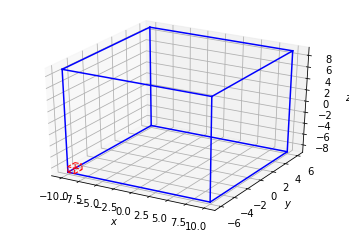

In [2]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
c1 = (-10, -6, -9)
c2 = (10, 6, 9)
cell = (1, 1, 1)
mesh = Mesh(c1, c2, cell=cell)
dim = 3
mesh.mpl()

After all the parameters are specified, we can create a field and give it a name.

In [3]:
field = Field(mesh, dim=dim, name='fdfield')

Now, we can set its value to be constant:

$$f(x, y, z) = (1, 3, 5)$$

In [4]:
value = (0, 0, 5)
field.value = value

After the field is set, we can plot its slice. Let's plot the slice perpendicular to the $x$ axis at the point $x=5$.

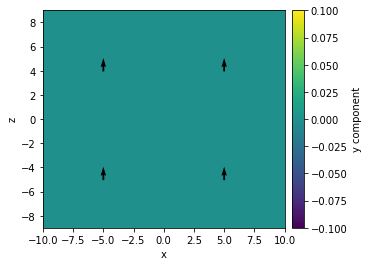

In [5]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
field.plane('y', n=(2,2)).mpl()

Now, we can set the field to be spatially varying, by providing a Python function defining its value:

$$f(x, y, z) = (2xy, 2y + x, x + z)$$

In [6]:
def value(pos):
    x, y, z = pos
    
    fx = x
    fy = y
    fz = z
    
    return (fx, fy, fz)

field.value = value

In [7]:
def normfun(pos):
    x, y, z = pos
    if x**2 + y**2 <= 25:
        return 1
    else:
        return 0
    
field.norm = normfun

Now, we can plot the 'z' slice at point 5:

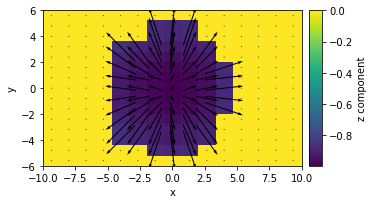

In [8]:
#PYTEST_VALIDATE_IGNORE_OUTPUT
field.plane(z=-9, n=(15, 15)).mpl(figsize=(5, 5))

In [9]:
field.norm

Field(mesh=Mesh(p1=(-10, -6, -9), p2=(10, 6, 9), cell=(1, 1, 1), pbc=set(), name='mesh'), dim=1, name='norm')

We can now see that $y-z$ slice is plotted, and colours correspond to the field's $x$-compoenent.

In [10]:
field.norm.k3d_nonzero()

Output()

In [11]:
field.z.plane(y=3).k3d_voxels(norm=field.norm)

Output()

In [15]:
field.k3d_vectors(points=True, color_field=field.z)

Output()

In [13]:
import matplotlib
cmap = matplotlib.cm.get_cmap('viridis', 256)
print(matplotlib.colors.rgb2hex(cmap(87)))

#306a8e


In [14]:
c

NameError: name 'c' is not defined

In [ ]:
data = [(coord, field(coord)) for coord in field.mesh if field.norm(coord) > 0]
coordinates, vectors = list(zip(*data))